# Panagiotis Karamitopoulos
# Assignment 8 - Neural Networks

# Import Libraries

In [1]:
import os
import PIL
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import tensorflow as tf
from sklearn.model_selection import train_test_split


#Question 1

#Download Dog Breed Image Dataset and Load it Here.


#Question 2

# Unzip Dataset Files


In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/Beagle/Beagle_27.jpg  
  inflating: dataset/Beagle/Beagle_28.jpg  
  inflating

#Question 3

#3.1 Load Class Names


In [3]:
class_names = sorted(os.listdir('dataset'))
class_ids = {label: i for i, label in enumerate(class_names)}
class_ids

{'Beagle': 0,
 'Boxer': 1,
 'Bulldog': 2,
 'Dachshund': 3,
 'German_Shepherd': 4,
 'Golden_Retriever': 5,
 'Labrador_Retriever': 6,
 'Poodle': 7,
 'Rottweiler': 8,
 'Yorkshire_Terrier': 9}

#3.2 Load & Display Image

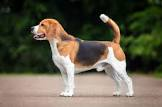

In [4]:
image_filepath = 'dataset/Beagle/Beagle_1.jpg'
image = PIL.Image.open(image_filepath)
image

#3.3 Load & Preprocess Images


In [5]:
image_size = (64, 64)

inputs = []
targets = []
for label in class_names:
    for filename in os.listdir(f'dataset/{label}'):
        filepath = f'dataset/{label}/{filename}'
        img = PIL.Image.open(filepath).convert('RGB').resize(image_size)
        inputs.append(img)
        targets.append(class_ids[label])
inputs = np.float32(inputs)
targets = np.int32(targets)

inputs.shape, targets.shape

((967, 64, 64, 3), (967,))

1. Φόρτωση 967 εικόνων RGB μεγέθους 64*64.
2. Κωδικοποίηση των ρατσών σε ακέραιους αριθμούς.

#3.4 Plot Target Distribution

<BarContainer object of 10 artists>

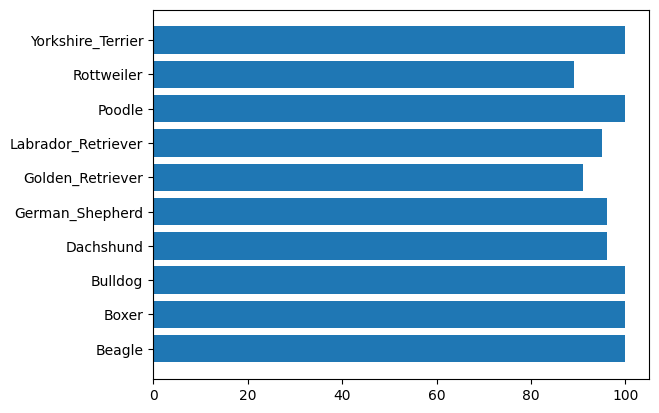

In [6]:
target_counts = np.unique(targets, return_counts=True)
plt.barh(class_names, target_counts[1])

#3.5 Setting Seeds To Enable Reproducability

In [7]:
seed = 0

tf.random.set_seed(seed=seed)
np.random.seed(seed=seed)
random.seed(seed)

#3.6 Split Inputs into Train-Test with Stratify Option

In [8]:
test_size = 0.3
stratify = [targets.shape]

x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    targets,
    test_size=0.3,
    stratify=targets,
    random_state=seed
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((676, 64, 64, 3), (676,), (291, 64, 64, 3), (291,))

#3.7 Preprocessing Dataset

In [9]:
x_train /= 255.0
x_test /= 255.0
y_train = np.eye(len(class_names))[y_train]
y_test = np.eye(len(class_names))[y_test]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((676, 64, 64, 3), (291, 64, 64, 3), (676, 10), (291, 10))

1. Κανονικοποίηση των εισόδων στο [0.0, 1.0] διαιρώντας με 255.0 (η ελάχιστη τιμή των pixel είναι 0.0, η μέγιστη τιμή των pixel είναι 255.0).
2. One-Hot κωδικοποίηση των targets ώστε να είναι κατάλληλη μορφή για τη συνάρτηση ενεργοποίησης Softmax.

# Question 4

# Building Multi-Layer Perceptron


In [10]:
input_size = x_train.shape[1:]
output_size = len(class_names)

mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='MLP')
mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,590,794 (6.07 MB)

 Trainable params: 1,590,794 (6.07 MB)

 Non-trainable params: 0 (0.00 B)

1. Είσοδος: (64, 64, 3) που μετατρέπεται σε ένα διάνυσμα μεγέθους 12288.
2. Έξοδος: 10 (αριθμός των κλάσεων).

#Question 5

# Training Neural Network


In [11]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
mlp.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 32
epochs = 30

history = mlp.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.0999 - loss: 4.0747 - val_accuracy: 0.1959 - val_loss: 2.3507
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1825 - loss: 2.2251 - val_accuracy: 0.2096 - val_loss: 2.0770
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3036 - loss: 1.9936 - val_accuracy: 0.3471 - val_loss: 1.9164
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4048 - loss: 1.7670 - val_accuracy: 0.4089 - val_loss: 1.7360
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5082 - loss: 1.5404 - val_accuracy: 0.4296 - val_loss: 1.6255
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5675 - loss: 1.3571 - val_accuracy: 0.4742 - val_loss: 1.4732
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6418 - loss: 1.1318 - val_accuracy: 0.5430 - val_loss: 1.3817
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7134 - loss: 0.9847 - val_accuracy: 0.5979 - val_loss

* Optimizer: Adam
* Learning Rate: 0.001
* Loss Function: Categorical Cross-Entropy
* Metrics: Accuracy
* Batch Size: 32
* Epochs: 30

#Question 6

# Evaluating Model Performance Per Epoch (Train-Test Loss, Train-Test Accuracy)


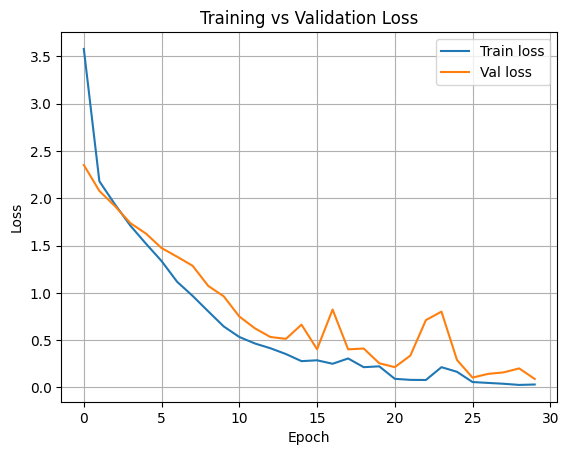

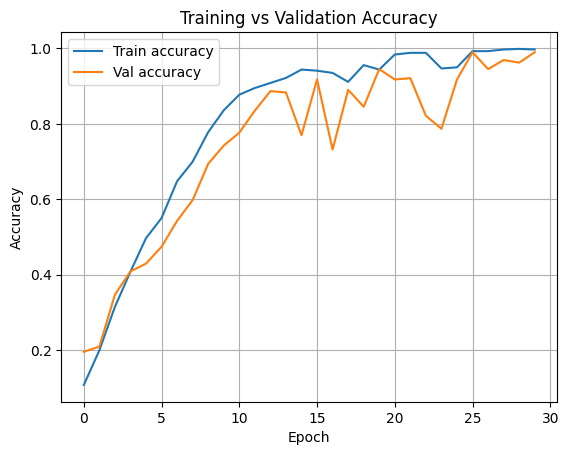

In [12]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#Question 7

#7.1 Building Convolutional Neural Network

In [13]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='CNN')
cnn.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,298 (13.18 MB)

 Trainable params: 3,456,298 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

#7.2 Training CNN

In [14]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - accuracy: 0.1046 - loss: 2.4699 - val_accuracy: 0.3677 - val_loss: 2.2155
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4154 - loss: 2.0333 - val_accuracy: 0.5464 - val_loss: 1.6435
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6743 - loss: 1.2041 - val_accuracy: 0.7560 - val_loss: 0.9441
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8861 - loss: 0.5298 - val_accuracy: 0.9141 - val_loss: 0.4303
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9692 - loss: 0.1911 - val_accuracy: 0.9485 - val_loss: 0.2078
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9901 - loss: 0.0689 - val_accuracy: 0.9622 - val_loss: 0.1355
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9956 - loss: 0.0546 - val_accuracy: 0.9794 - val_loss: 0.1237
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 0.0360 - val_accuracy: 0.9897 - 

#7.3 Evaluating Model Performance Per Epoch (Train-Test Loss, Train-Test Accuracy)


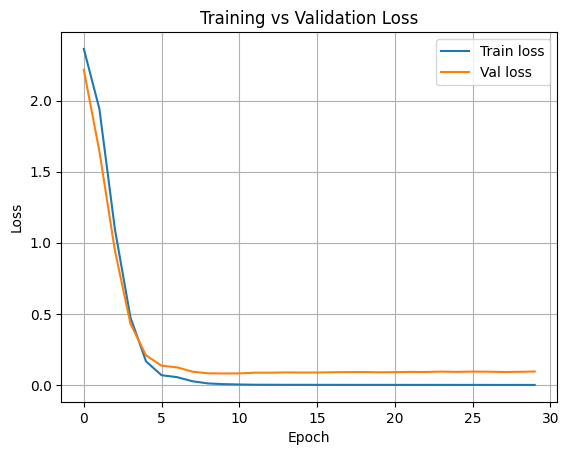

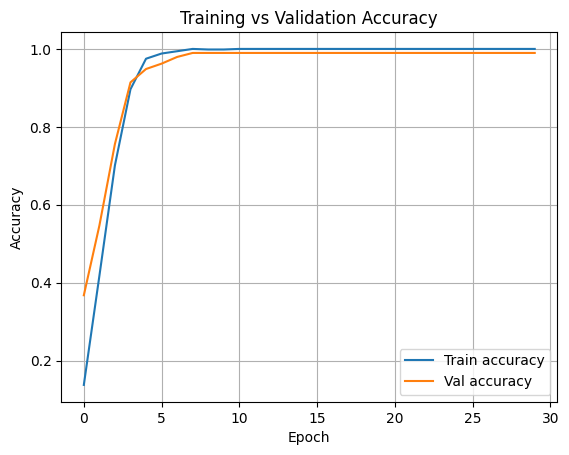

In [15]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

1. Το MLP κάνει "flatten" τις εικόνες ως αποτέλεσμα χάνεται η χωρική σχέση μεταξύ των γειτονικών pixel. Σε αντίθεση, το CNN χρησιμοποιεί συνελικτικά φίλτρα, τα οποία σαρώνουν την εικόνα και διατηρούν τη χωρική δομή της, ως αποτέλεσμα μπορεί να αναγνωρίσει σχήματα, ανεξάρτητα από το που βρίσκονται μέσα στην εικόνα.
2. Το MLP μαθαίνει από μεμονωμένα pixel, κάτι που είναι πολύ δύσκολο για σύνθετα δεδομένα όπως οι ράτσες σκύλων. Αντιθέτως, το CNN μαθαίνει αυτόματα να βρίσκει χαρακτηριστικά στα πρώτα επίπεδα.
3. Στο MLP υπάρχουν πάρα πολλοί παράμετροι στο πρώτο επίπεδο, ως αποτέλεσμα είναι επιρρεπές σε υπερπροσαρμογή. Από την άλλη πλευρά, στο CNN τα βάρη μοιράζονται μέσω των φίλτρων με αποτέλεσμα το μοντέλο να είναι πιο αποδοτικό.
4. Eπιπλέον, σύμφωνα με τα παραπάνω διαγράμματα προκύπτει ότι το CNN παρουσιάζει μεγαλύτερη ακρίβεια στο test set σε σύγκριση με το MLP.

Συνεπώς, το καλύτερο μοντέλο είναι το CNN.


#Question 8

#8.1 Building an Improved Convolutional Neural Network

In [16]:
improved_cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units=256, activation='relu', use_bias=True),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name="Improved_CNN")
improved_cnn.summary()


Model: "Improved_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,276,618 (4.87 MB)

 Trainable params: 1,276,170 (4.87 MB)

 Non-trainable params: 448 (1.75 KB)

#8.2 Training CNN

In [17]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
improved_cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

history = improved_cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[lr_reducer]
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 282ms/step - accuracy: 0.2892 - loss: 3.6398 - val_accuracy: 0.1065 - val_loss: 2.4485 - learning_rate: 0.0010
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7216 - loss: 0.8094 - val_accuracy: 0.0997 - val_loss: 5.6904 - learning_rate: 0.0010
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9190 - loss: 0.2753 - val_accuracy: 0.0997 - val_loss: 7.7669 - learning_rate: 0.0010
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9556 - loss: 0.1390 - val_accuracy: 0.0997 - val_loss: 8.9952 - learning_rate: 0.0010
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9610 - loss: 0.1163 - val_accuracy: 0.0997 - val_loss: 10.4716 - learning_rate: 0.0010
Epoch 6/30
17/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9836 - loss: 0.0585
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9828 - loss: 0.0607 - val_ac

#8.3 Evaluating Model Performance Per Epoch (Train-Test Loss, Train-Test Accuracy)


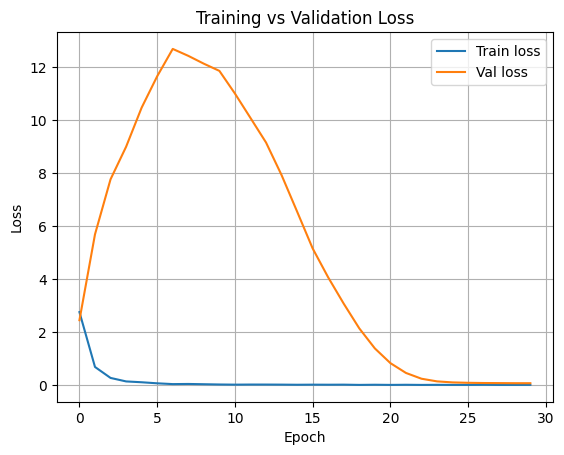

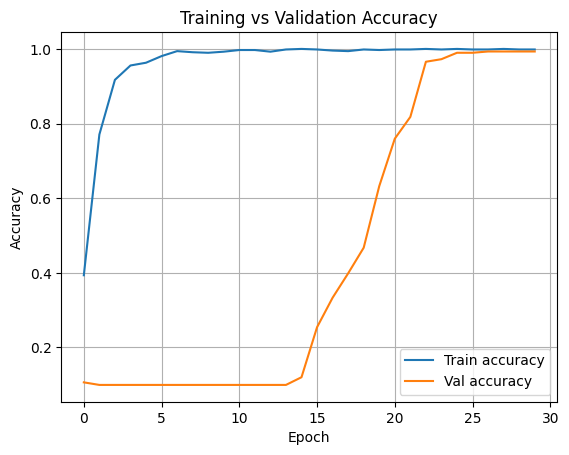

In [18]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 2.1395e-04 - val_accuracy: 0.9897 - val_loss: 0.0948

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9997 - loss: 0.0069 - val_accuracy: 0.9931 - val_loss: 0.0705 - learning_rate: 1.2500e-04

Σύμφωνα με τα παραπάνω αποτελέσματα η απόδοση στο test_set αυξήθηκε σε 0.9931 από 0.9897, ενώ οι απώλειες μειώθηκαν σε 0.0644 από 0.0948, κάτι το οποίο σημαίνει ότι το μοντέλο είναι ακόμα πιο σίγουρο για τις αποφάσεις του.

Πιο συγκεκριμένα για τη βελτίωση της ακρίβειας του μοντέλου CNN εφαρμόσθηκαν τα εξής:
1. Batch Normalization: Κανονικοποίηση των εξόδων των ενδιάμεσων συνελικτικών επιπέδων, ώστε να περιορίζονται προβλήματα ακραίων τιμών των gradients.

2. Αύξηση του αριθμού των συνελικτικών επιπέδων: Το δίκτυο ξεκινά να μαθαίνει απλά μοτίβα και σταδιακά μαθαίνει πιο σύνθετα, κάτι που είναι απαραίτητο για τη διάκριση των ρατσών των σκύλων.

3. Προοδευτική αύξηση του αριθμού των φίλτρων στα συνελικτικά επίπεδα: Η αύξηση των φίλτρων από 32 σε 64 και 128 επιτρέπει την εξαγωγή πιο σύνθετων χαρακτηριστικών από τις εικόνες χωρίς να οδηγεί σε μεγάλη αύξηση της πολυπλοκότητας σε σύγκριση με το αρχικό μοντέλο.

4. Χρήση MaxPooling: Εφαρμογή ΜaxPooling μετά από κάθε συνελικτικό επίπεδο, αντί της χρήσης μεγάλων τιμών stride. Η τεχνική αυτή διατηρεί τις σημαντικότερες πληροφορίες από τα feature maps, οδηγώντας στη μείωση των χωρικών διαστάσεων και συμβάλλοντας στη βελτίωση της γενίκευσης.

5. Εφαρμογή Dropout στο πλήρως συνδεδεμένο επίπεδο: Με αυτόν τον τρόπο μειώνεται η υπερπροσαρμογή καθώς το μοντέλο αποφεύγει την υπερβολική εξάρτηση από συγκεκριμένους νευρώνες.

6. Εφαρμογή Dropout στο πλήρως συνδεδεμένο επίπεδο: Με αυτόν τον τρόπο μειώνεται η υπερπροσαρμογή καθώς το μοντέλο αποφεύγει την υπερβολική εξάρτηση από συγκεκριμένους νευρώνες.